Dataset sobre el uso de energía en Europa, el consumo de energía es dado en vatios

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data_url = "https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/df_power.csv"

In [3]:
data_power = pd.read_csv(data_url)
data_power

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.18400,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [4]:
data_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


**Convertir la columna de fecha "Date"**

In [5]:
data_power["Date"] = pd.to_datetime(data_power["Date"])
data_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


In [6]:
# Fijar la fecha como índice
data_power = data_power.set_index("Date")
data_power.head(3)

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN
2006-01-02,1,1380.521,NaN,NaN,NaN
2006-01-03,2,1442.533,NaN,NaN,NaN


In [7]:
data_power["year"] = data_power.index.year
data_power["month"] = data_power.index.month
data_power["day"] = data_power.index.day_name()

In [8]:
data_power

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,2,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,3,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,4,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,4379,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,4380,1295.08753,584.277,29.854,614.131,2017,12,Friday


## Visualización

In [9]:
import matplotlib.pyplot as plt

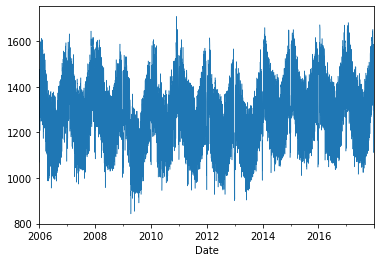

In [10]:
data_power["Consumption"].plot(linewidth=0.5)

In [11]:
data_power.columns

Index(['Unnamed: 0', 'Consumption', 'Wind', 'Solar', 'Wind+Solar', 'year',
       'month', 'day'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47f1eebe90>,
      dtype=object)

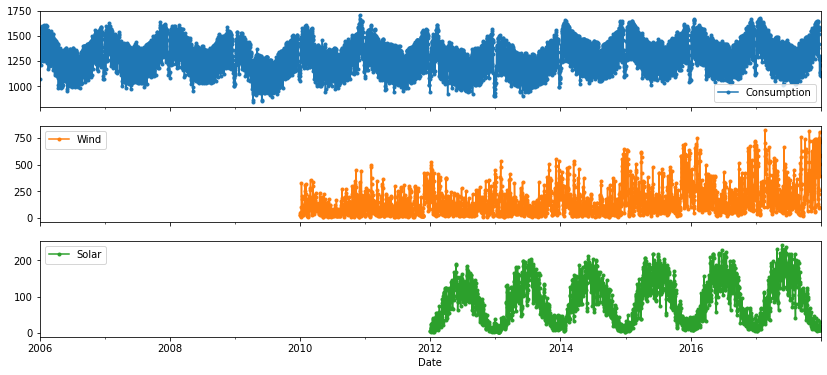

In [12]:
column_names = ["Consumption", "Wind", "Solar"]
data_power[column_names].plot(marker=".", figsize=(14, 6), subplots=True)

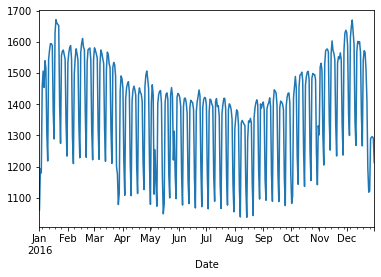

In [13]:
# filtrando
data_power.loc["2016", "Consumption"].plot()

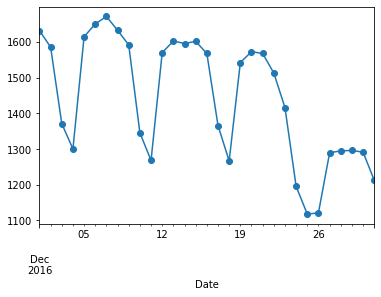

In [14]:
data_power.loc["2016-12", "Consumption"].plot(marker="o")

Varias gráficas al mismo tiempo

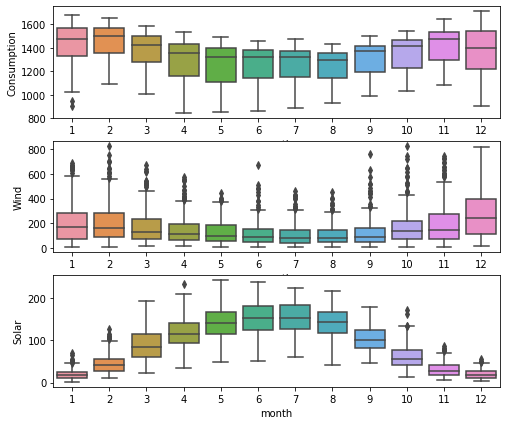

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 7))

for column_name, ax in zip(["Consumption", "Wind", "Solar"], axes):
  sns.boxplot(data=data_power, x="month", y=column_name, ax=ax)
